基础理论部分

Q：Can you come up out 3 sceneraies which use AI methods?
A：人脸识别，语音识别，在线翻译，智能驾驶
Q: How do we use Github; Why do we use Jupyter and Pycharm;
A：Github 目前使用者众多，每个人都可以复制开源库并进行修改，修改后的库可与原库合并，方便团队对源代码进行修改。
Jupyter本质是一个 Web 应用程序，其一般被用来创建和共享程序文档，支持实时代码，数学方程，可视化和 markdown，方便演示学习。
Pycharm具有一般程序IDE所具有的功能，而且其具有的部分功能，对于初学者来说，非常友好。
Q:What's the Probability Model?
A：在智能对话中，概率模型用于字与字或者是字与词之间的合适的搭配模型，通过计算提问语句的答语在语样本中的概率，择优选出最合适的回答语句。
Q:Can you came up with some sceneraies at which we could use Probability Model?
A:导航，智能音箱
Q:Why do we use probability and what's the difficult points for programming based on parsing and pattern match?
A:我认为语法分析或者模式匹配难度主要在于计算机无法识别词语在不同场景中的词性，且在同一句中，相同的词语可能代表不同的意思，我们无法给与计算机精准的词性定义，很大可能上会导致相互冲突。
Q:What's the Language Model;
A:我认为语言模型是一个形式系统，其更多的被用来将具体事实经过语言模型的分析处理，以便计算机能够更快的计算处理语句。
Q:Can you came up with some sceneraies at which we could use Language Model?
A:语音识别，在线翻译，同声翻译
Q:What's the 1-gram language model;
A:1-gram language model是计算单个字或者词语在样本中的统计概率。
Q:What's the disadvantages and advantages of 1-gram language model;
A:个人认为优点在于词语较短，样本中的出现频率，计算准确率较高。
缺点在于对于具体应用场景来说，单个词语无法满足需要。
Q:What't the 2-gram models;
A：通过计算两个不同词语在样本中的概率，其组合性会更好。也会更加满足实际需要。

In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [2]:
another_grammar = """
#
"""

In [3]:
import random

In [4]:
def adj():return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [5]:
def adj_star():
    return random.choice([lambda : ' ', lambda : adj() + adj_star()])()

In [6]:
adj_star()

' '

# 更换语法

In [7]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [8]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [9]:
gram = create_grammar(adj_grammar)

In [10]:
gram['Adj*']

[['null'], ['Adj', 'Adj*']]

In [11]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # mean target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [12]:
example_grammar = create_grammar(simple_grammar, '=>', '\n')

In [13]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [14]:
generate(gram = example_grammar, target = 'sentence')

'一个小猫坐在一个小猫'

In [15]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [16]:
for i in range(5):
    print(generate(gram = create_grammar(host, split = '='), target = 'host'))

先生,您好我是6号,请问你要喝酒吗？
您好我是3号,您需要打猎吗？
先生,您好我是91号,请问你要打猎吗？
你好我是867号,请问你要赌博吗？
小朋友,你好我是5号,您需要赌博吗？


In [17]:
for j in range(5):
    print(generate(gram = create_grammar(human, split = '='), target = 'human'))

俺想找点乐子
我们想找点乐子
我找找玩的
我们找找乐子
俺想找点乐子


In [18]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [19]:
generate(gram = create_grammar(human, split = '='), target = 'human')

'俺想找点玩的'

In [20]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [21]:
generate(gram = create_grammar(programming, split = '=>'), target = 'stmt')

'if(info1){\n....if(name3){\n....while(studentname1){\n....while(namecourse1){\n....if(infoinfo1){\n....databasestudent1=database1}}}}}'

#next task

In [22]:
filename = "/Users/zhuxiang/Desktop/export_sql_1558435/sqlResult_1558435.csv"

In [23]:
import pandas as pd

In [24]:
content = pd.read_csv(filename, encoding = 'gb18030')

In [25]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [26]:
articles = content['content'].tolist()

In [27]:
len(articles)

89611

In [28]:
import re

In [29]:
def token(string):
    return re.findall('\w+', string)

In [30]:
from collections import Counter

In [31]:
import jieba

In [32]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\zhuxiang\AppData\Local\Temp\jieba.cache
Loading model cost 1.602 seconds.
Prefix dict has been built succesfully.


In [33]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [34]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [35]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [36]:
len(articles_clean)

89611

In [37]:
with open ('articles_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [38]:
def cut(string):return list(jieba.cut(string))

In [39]:
TOKEN = []
for i, line in enumerate((open('articles_9k.txt'))):
    if i % 100 == 0: print(i)
        
    if i > 1000:break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000


In [40]:
from functools import reduce

In [41]:
from operator import add, mul

In [42]:
reduce(add, [1, 2, 3, 4, 5])

15

In [43]:
from collections import Counter

In [44]:
words_count = Counter(TOKEN)

In [45]:
words_count.most_common(100)

[('的', 23751),
 ('在', 6161),
 ('了', 5477),
 ('是', 3993),
 ('和', 3471),
 ('也', 2085),
 ('有', 2002),
 ('月', 1999),
 ('将', 1746),
 ('他', 1619),
 ('年', 1611),
 ('对', 1443),
 ('等', 1423),
 ('都', 1417),
 ('为', 1387),
 ('日', 1351),
 ('中', 1332),
 ('不', 1314),
 ('上', 1307),
 ('与', 1281),
 ('就', 1277),
 ('我', 1261),
 ('被', 1249),
 ('中国', 1236),
 ('6', 1230),
 ('到', 1172),
 ('人', 1094),
 ('这', 1069),
 ('但', 1051),
 ('\n', 1001),
 ('一个', 984),
 ('后', 953),
 ('从', 951),
 ('还', 919),
 ('说', 911),
 ('并', 899),
 ('我们', 895),
 ('会', 843),
 ('而', 806),
 ('没有', 791),
 ('市场', 767),
 ('表示', 730),
 ('记者', 724),
 ('让', 717),
 ('进行', 685),
 ('要', 683),
 ('已经', 672),
 ('可以', 670),
 ('自己', 670),
 ('个', 657),
 ('他们', 645),
 ('时', 625),
 ('以', 622),
 ('发展', 620),
 ('下', 616),
 ('公司', 606),
 ('更', 567),
 ('5', 561),
 ('着', 557),
 ('你', 555),
 ('这个', 546),
 ('就是', 533),
 ('多', 521),
 ('能', 511),
 ('其', 507),
 ('目前', 505),
 ('可能', 504),
 ('企业', 485),
 ('3', 483),
 ('旅游', 483),
 ('通过', 481),
 ('她', 477),
 ('给', 472)

In [46]:
frequiences = [f for w, f in words_count.most_common(100)]

In [47]:
x = [i for i in range(100)]

In [48]:
import matplotlib.pyplot as plt

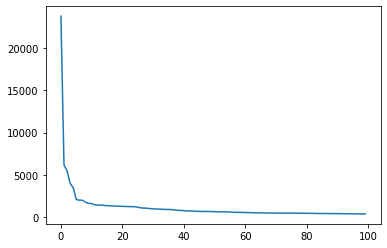

In [49]:
plt.plot(x, frequiences)

In [50]:
import numpy as np

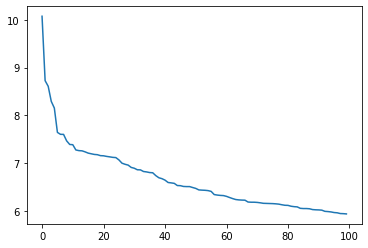

In [51]:
plt.plot(x, np.log(frequiences))

In [52]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [53]:
prob_1('我们')

0.00202712956189087

In [54]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [55]:
TOKEN = [str(t) for t in TOKEN]

In [56]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [57]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [58]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [59]:
def prob_1(word): return words_count[word] / len(TOKEN)

In [60]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [61]:
prob_2('我们', '在')

5.20940682975885e-05

In [62]:
prob_2('在', '吃饭')

2.2649594911995e-06

In [63]:
def get_probablity(sentence):
    words = cut(sentence)
    
    sentence_pro = 1
    
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        
        probability = prob_2(word, next_)
        
        sentence_pro *= probability
    
    return sentence_pro

In [64]:
get_probablity('小明今天抽奖抽到一台苹果手机')

8.100538393554692e-34

In [65]:
get_probablity('小明今天抽奖抽到一架波音飞机')

1.3500897322591154e-34

In [66]:
get_probablity('洋葱奶昔来一杯')

1.1619336178367143e-17

In [67]:
get_probablity('养乐多绿来一杯')

5.130041496774698e-12

In [68]:
get_probablity('酸梅绿豆汤来一桶')

1.1619336178367143e-17

In [69]:
for sen in [generate(gram = example_grammar, target = 'sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个桌子看见这个小猫 with Prb: 2.6317325758630385e-23
sentence: 这个小猫看见一个好看的女人 with Prb: 1.6201076787109385e-33
sentence: 一个小小的桌子看见一个蓝色的蓝色的小猫 with Prb: 1.5687146470080346e-51
sentence: 这个小猫看着一个好看的蓝色的小小的篮球 with Prb: 4.7061439410241045e-51
sentence: 这个小猫看见一个小小的小小的篮球 with Prb: 1.3500897322591154e-34
sentence: 一个篮球看见一个好看的桌子 with Prb: 4.050269196777346e-34
sentence: 一个小小的蓝色的桌子坐在一个女人 with Prb: 3.0578985530512753e-40
sentence: 一个好看的女人听着一个好看的蓝色的好看的小小的小小的蓝色的小小的女人 with Prb: 3.1892818742838555e-99
sentence: 这个小小的蓝色的篮球听着一个女人 with Prb: 1.662243924206089e-44
sentence: 一个好看的女人看见这个蓝色的篮球 with Prb: 1.6622439242060883e-44


In [70]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

In [71]:
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probablity {}'.format(s1, p1))
    print('-'*4 + ' {} with probablity {}'.format(s2, p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probablity 7.106150257449043e-57
---- 明天晚上请你吃大餐，我们一起吃苹果 with probablity 7.106150257449043e-57
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probablity 1.7882303027999694e-28
---- 真是一只好看的小猫 with probablity 7.895197727589115e-23
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probablity 1.394320341404057e-16
---- 今晚火锅去吃我 with probablity 5.263465151726077e-23
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probablity 1.1619336178367143e-17
---- 养乐多绿来一杯 with probablity 5.130041496774698e-12


#在陌生地方寻求帮助时

In [72]:
# 提问者
ask = """
ask => 礼貌用语 尊称 提问 目的地 方式 结尾
礼貌用语 => 你好 | 您好 | 打扰一下
尊称 => 小哥哥 | 小姐姐 | 大爷 | 大叔 | 阿姨
提问 => 请问 | 请
目的地 => 图书馆 | 游泳池 | 食堂 | 教室 | 体育馆
方式 => 怎么走 | 那里去
结尾 => 吗？
"""
# 回答者
respond = """
respond => 交通方式 方向 路程 结尾
交通方式 => 步行 | 骑车 | 乘车
方向 => 向东 | 向南 | 向西 | 向北
路程 => 100m | 200m | 500m | 1Km | 5Km
结尾 => 就到了 | 就行了
"""

In [73]:
for i in range(5):
    print(generate(gram = create_grammar(ask, split = '=>'),target = 'ask'))

打扰一下阿姨请图书馆那里去吗？
你好大叔请问教室怎么走吗？
打扰一下小哥哥请问体育馆那里去吗？
您好大叔请图书馆怎么走吗？
你好小哥哥请食堂那里去吗？


In [74]:
for i in range(5):
    print(generate(gram = create_grammar(respond, split = '=>'), target = 'respond'))

乘车向西500m就到了
步行向西1Km就行了
乘车向南1Km就行了
乘车向东500m就到了
乘车向南1Km就行了


In [75]:
AI_human = """
AI_human = 人物 时间 预定 房间
人物 = 我 | 我们 | 我两 | 咱家  
时间 = 今晚 | 明晚 | 明早 | 这周六晚
预定 = 要 | 订 | 预约
房间 = 101房 | 102房 | 105房 | 666房 | 555房 | 434房 | 786房 
"""
AI_host = """
AI_host = 礼貌用语 询问 业务相关 结尾 
礼貌用语 = 你好 | 您好 | 您早上好
询问 = 确定 | 肯定 | 一定 
业务相关 = 需要 | 要 | 购买 
结尾 = 吗？"""

In [76]:
for i in range(5):
    print(generate(gram = create_grammar(AI_human, split = '='), target = 'AI_human'))

我们这周六晚订105房
我两今晚要555房
我明晚订102房
我们这周六晚要105房
我两明早要666房


In [77]:
for i in range(5):
    print(generate(gram = create_grammar(AI_host, split = '='), target = 'AI_host'))

你好确定需要吗？
你好一定购买吗？
您好一定需要吗？
你好一定需要吗？
你好肯定需要吗？


In [78]:
print(generate(gram = create_grammar(AI_host, split = '='), target = 'AI_host'))

你好肯定需要吗？


In [79]:
def generate_n(number):
    for i in range(int(number)):
        print(generate(gram = create_grammar(AI_host, split = '='), target = 'AI_host'))

In [80]:
gram = generate_n(10)

您早上好一定要吗？
您好一定需要吗？
你好肯定要吗？
您早上好确定需要吗？
你好肯定购买吗？
您早上好确定需要吗？
您早上好确定要吗？
您早上好确定购买吗？
您早上好确定要吗？
你好确定需要吗？


In [81]:
filename = '/Users/zhuxiang/Documents/NLP/datasource-master/datasource-master/movie_comments.csv'

In [87]:
import pandas as pd

In [162]:
content_1 = pd.read_csv(filename, low_memory = False)

In [163]:
content_1.head(100)

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1
5,6,https://movie.douban.com/subject/26363254/,战狼2,“犯我中华者，虽远必诛”，吴京比这句话还要意淫一百倍。,1
6,7,https://movie.douban.com/subject/26363254/,战狼2,脑子是个好东西，希望编剧们都能有。,2
7,8,https://movie.douban.com/subject/26363254/,战狼2,三星半，实打实的7分。第一集在爱国主旋律内部做着各种置换与较劲，但第二集才真正显露吴京的野心...,4
8,9,https://movie.douban.com/subject/26363254/,战狼2,开篇长镜头惊险大气引人入胜 结合了水平不俗的快剪下实打实的真刀真枪 让人不禁热血沸腾 特别弹...,4
9,10,https://movie.douban.com/subject/26363254/,战狼2,15/100吴京的冷峰在这部里即像成龙，又像杰森斯坦森，但体制外的同类型电影，主角总是代表个...,1


In [164]:
articles_1 = content_1['comment'].tolist()

In [165]:
len(articles_1)

261497

In [166]:
from collections import Counter

In [167]:
with_jieba_cut = Counter(articles_1[100])

In [170]:
with_jieba_cut.most_common()[:100]# 无法读取整个excel中的comment

[('?', 3),
 ('w', 1),
 ('t', 1),
 ('f', 1),
 ('我', 1),
 ('为', 1),
 ('啥', 1),
 ('要', 1),
 ('看', 1),
 ('这', 1),
 ('个', 1)]

In [158]:
''.join(token(articles[110]))

'没看过'

In [168]:
articels_clean = [''.join(token(str(a)))for a in articles_1]

In [169]:
len(articles_clean)

89611